In [28]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [29]:
# 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.9777777777777777


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [30]:
# 2. Write a Python program to apply Ll regularization (Lasso) on a dataset using LogisticRegression(penalty=II') and print the model accuracy.
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')
model_l1.fit(X_train, y_train)
print("L1 Regularization Accuracy:", model_l1.score(X_test, y_test))

L1 Regularization Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [31]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty=12'). Print model accuracy and coefficients.
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr')
model_l2.fit(X_train, y_train)
print("L2 Regularization Accuracy:", model_l2.score(X_test, y_test))
print("L2 Coefficients:", model_l2.coef_)

L2 Regularization Accuracy: 0.9777777777777777
L2 Coefficients: [[ 0.36479402  1.35499766 -2.09628559 -0.92154751]
 [ 0.4808915  -1.58463288  0.3937527  -1.09224057]
 [-1.5286415  -1.43244729  2.3048277   2.08584535]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [32]:
# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet).
model_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, multi_class='ovr', max_iter=5000)
model_elastic.fit(X_train, y_train)
print("Elastic Net Accuracy:", model_elastic.score(X_test, y_test))

Elastic Net Accuracy: 0.9555555555555556


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [33]:
# 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.
model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear')
model_ovr.fit(X_train, y_train)
print("OvR Accuracy:", model_ovr.score(X_test, y_test))

OvR Accuracy: 0.9777777777777777


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [34]:
# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid Search with cross-validation
grid = GridSearchCV(LogisticRegression(multi_class='ovr'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.9523809523809523


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

In [35]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.
from sklearn.model_selection import cross_val_score

# Stratified K-Fold CV
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [1.         0.96666667 0.93333333 0.9        1.        ]
Average Accuracy: 0.9600000000000002


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

In [36]:
# 8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Iris.csv')

# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Handle non-numeric columns (if any) - example using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for potential convergence issues
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [37]:
#9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.
param_dist = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
random_search = RandomizedSearchCV(LogisticRegression(multi_class='ovr'), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best Score (RandomizedSearchCV):", random_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_

Best Parameters (RandomizedSearchCV): {'solver': 'liblinear', 'penalty': 'l2', 'C': 100.0}
Best Score (RandomizedSearchCV): 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

In [39]:
#10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

from sklearn.multiclass import OneVsOneClassifier

# Create the OvO classifier with Logistic Regression
ovo_classifier = OneVsOneClassifier(LogisticRegression(solver='liblinear'))

# Train the classifier
ovo_classifier.fit(X_train, y_train)

# Make predictions
y_pred_ovo = ovo_classifier.predict(X_test)

# Calculate the accuracy
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print("One-vs-One Accuracy:", accuracy_ovo)


One-vs-One Accuracy: 1.0


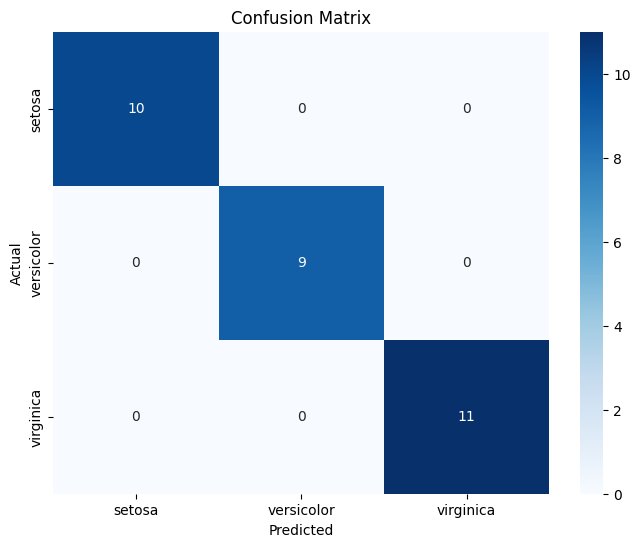

In [40]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from a previous model prediction
# Example:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [41]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and Fl-Score.

# Evaluate performance using Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined from a previous model prediction
# Example using the initial Logistic Regression model:

# ... (previous code)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [42]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

from sklearn.datasets import make_classification

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate class weights
class_weights = {0: 1, 1: 10} # Adjust weights as needed

# Train Logistic Regression with class weights
model_weighted = LogisticRegression(class_weight=class_weights, solver='liblinear')
model_weighted.fit(X_train, y_train)

# Make predictions
y_pred_weighted = model_weighted.predict(X_test)

# Evaluate performance
print("Weighted Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Weighted Logistic Regression Precision:", precision_score(y_test, y_pred_weighted))
print("Weighted Logistic Regression Recall:", recall_score(y_test, y_pred_weighted))
print("Weighted Logistic Regression F1-Score:", f1_score(y_test, y_pred_weighted))


Weighted Logistic Regression Accuracy: 0.765
Weighted Logistic Regression Precision: 0.30158730158730157
Weighted Logistic Regression Recall: 0.8636363636363636
Weighted Logistic Regression F1-Score: 0.4470588235294118


In [43]:
#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the Titanic dataset (replace 'titanic.csv' with the actual file path)
try:
    df = pd.read_csv('titanic.csv')
except FileNotFoundError:
    print("Error: 'titanic.csv' not found. Please upload the file or provide the correct path.")
    exit()


# Feature Engineering (example: create 'FamilySize' feature)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Select relevant features and target variable
features = ['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize']
target = 'Survived'

# Separate features and target
X = df[features]
y = df[target]

# Impute missing numerical values (Age and Fare) with the mean
num_imputer = SimpleImputer(strategy='mean')
X[['Age', 'Fare']] = num_imputer.fit_transform(X[['Age', 'Fare']])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for potential convergence issues
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8100558659217877


<ipython-input-43-f017e489038a>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Fare']] = num_imputer.fit_transform(X[['Age', 'Fare']])


In [44]:
#15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with scaled features
model_scaled = LogisticRegression(multi_class='ovr', solver='liblinear')
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
print("Scaled Model Accuracy:", accuracy_score(y_test, y_pred_scaled))


Scaled Model Accuracy: 0.8100558659217877


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [45]:
#16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

# Calculate ROC AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1] # Assuming binary classification
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.8823680823680824


In [46]:
#17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

# Train Logistic Regression with a custom learning rate (C=0.5)
model_custom_c = LogisticRegression(C=0.5, multi_class='ovr', solver='liblinear')
model_custom_c.fit(X_train, y_train)
y_pred_custom_c = model_custom_c.predict(X_test)
accuracy_custom_c = accuracy_score(y_test, y_pred_custom_c)
print(f"Accuracy with C=0.5: {accuracy_custom_c}")


Accuracy with C=0.5: 0.7821229050279329


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [47]:
#18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming 'X_train', 'y_train', 'X_test', and 'y_test' are already defined
# Example (replace with your actual data loading and preprocessing):
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# data = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the model coefficients
coefficients = model.coef_

# Create a DataFrame to display coefficients with feature names
feature_names = ['feature_' + str(i) for i in range(X_train.shape[1])] # Replace with actual feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]}) # Assuming a binary classification problem

# Sort by the absolute value of coefficients to identify the most important features
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

coef_df


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Coefficient,Abs_Coefficient
1,feature_1,-2.595256,2.595256
3,feature_3,-1.175736,1.175736
4,feature_4,-0.965158,0.965158
0,feature_0,-0.888801,0.888801
8,feature_8,0.874947,0.874947
7,feature_7,-0.352307,0.352307
6,feature_6,0.127420,0.127420
2,feature_2,-0.028149,0.028149
5,feature_5,0.003277,0.003277


In [48]:
#19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen's Kappa Score.

# Calculate Cohen's Kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa}")

Cohen's Kappa Score: 0.605215360664245


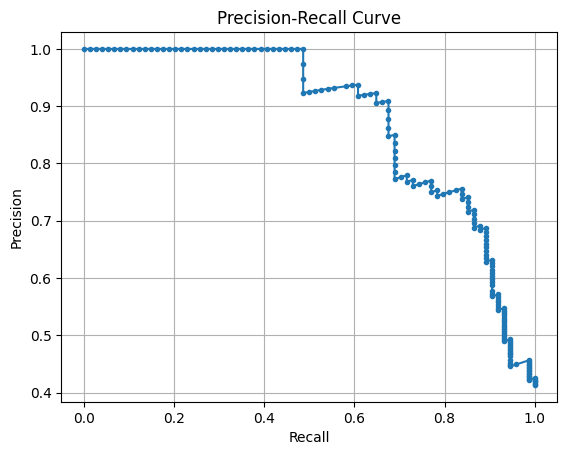

In [49]:
#20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

# Assuming X_test, y_test, and a trained model (e.g., 'model') are available from previous code.

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (assuming binary classification)
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [50]:
#21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X, y are already defined (from the previous code)

solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=10000) # Increased max_iter for convergence
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy with solver '{solver}': {accuracy}")
    except Exception as e:
        print(f"Error with solver '{solver}': {e}")


Accuracy with solver 'liblinear': 0.7877094972067039
Accuracy with solver 'saga': 0.776536312849162
Accuracy with solver 'lbfgs': 0.8100558659217877


In [51]:
#22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

from sklearn.metrics import matthews_corrcoef

# Assuming y_test and y_pred are already defined from a previous model prediction

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc}")


Matthews Correlation Coefficient (MCC): 0.6058691922784846


In [52]:
#23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Train Logistic Regression on raw data
model_raw = LogisticRegression(multi_class='ovr', solver='liblinear')
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy on raw data: {accuracy_raw}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on standardized data
model_scaled = LogisticRegression(multi_class='ovr', solver='liblinear')
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy on standardized data: {accuracy_scaled}")


Accuracy on raw data: 0.7877094972067039
Accuracy on standardized data: 0.8100558659217877


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [53]:
#24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train are already defined from previous code

# Define the parameter grid for C (regularization strength)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a Logistic Regression model
logreg = LogisticRegression(solver='liblinear') # Choose an appropriate solver

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the optimal C value and the corresponding accuracy score
print("Best C:", grid_search.best_params_['C'])
print("Best Accuracy:", grid_search.best_score_)


Best C: 1
Best Accuracy: 0.7948980596867921


In [54]:
#25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

import joblib

# Save the trained model
joblib.dump(model, 'logistic_regression_model.joblib')

# Load the saved model
loaded_model = joblib.load('logistic_regression_model.joblib')

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded))


Loaded Model Accuracy: 0.8100558659217877
